In [2]:
#import libraries 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from skimage.exposure import equalize_adapthist
import numpy as np

import cv2

import os

from rembg.bg import remove
import io
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

print(os.listdir("rice_leaf_diseases"))


UnsupportedParforsError: Failed in nopython mode pipeline (step: native lowering)
[1m[1mThe 'parallel' target is not currently supported on 32 bit hardware.[0m
[0m[1mDuring: lowering "id=1[LoopNest(index_variable = parfor_index.128, range = (0, $20binary_subscr.8, 1))]{132: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (177)>, 134: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (177)>, 264: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (193)>, 266: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (193)>, 530: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (216)>, 30: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (155)>, 420: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (206)>, 304: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (198)>, 564: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (222)>, 574: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (228)>, 575: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (169)>, 576: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (234)>, 324: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (199)>, 452: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (211)>, 198: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (184)>, 454: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (190)>, 326: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (199)>, 214: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (185)>, 86: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (169)>, 216: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (188)>, 342: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (201)>, 120: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (176)>, 350: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (199)>, 96: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (170)>, 230: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (190)>, 358: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (204)>, 496: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (213)>, 248: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (190)>, 250: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (190)>, 380: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (206)>, 382: <ir.Block at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (206)>}Var(parfor_index.128, kdtree.py:155)" at C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pymatting\util\kdtree.py (155)[0m

In [ ]:
#path folder penyakit
blb_img_path = "rice_leaf_diseases/bacterial_leaf_blight"
bs_img_path = "rice_leaf_diseases/brown_spot"
ls_img_path = "rice_leaf_diseases/leaf_smut"


def createArrayOfImage(path):
    """
    Create an array to hold all image
      First image will be converted to RGB
      then will be appended to array using append function
    Args:
        path: path of the image folder directory in string
    Returns: array of images  
    """
    array = []
    os_path = os.listdir(path)
    for img in os_path[:]:
        # print(path + "/" + img)
        read_img = cv2.imread(path + "/" + img) #read image from path
        rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB) #convert image color to RGB
        # eq_img = equalize_adapthist(rgb_img)
        r_bg_img = remove(
            rgb_img,
            alpha_matting=True,
            alpha_matting_foreground_threshold=240,
            alpha_matting_background_threshold=10,
            alpha_matting_erode_size=10,
        )
        array.append(r_bg_img)
    return array
        
#function display all images
def displayArrImg(array):
    """
    Display all images from an array
    Args:
        array: array that contains image data type
    Returns: Image displayed using matlotlib
    """
    n = len(array)
    # f = plt.figure()
    for i in range(n):
        plt.figure()
        plt.imshow(array[i])
        plt.show(block = True)

displayArrImg(createArrayOfImage(blb_img_path))

# x = cv2.imread("./rice_leaf_diseases/bacterial_leaf_blight/DSC_0366.jpg")
# x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
# plt.imshow(x)
# plt.show()

NameError: name 'remove' is not defined

In [ ]:
def getRGB(event,x,y): #(Based from stackoverflow by Wicaledon to get RGB color values from clicked pixel of an image)
    if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
        colorsR = image[y,x,2]
        colorsG = image[y,x,1]
        colorsB = image[y,x,0]
        colors = image[y,x]
        print("RGB Format: ",colors)
        print("Pixel Coordinates: X: ",x,"Y: ",y)

Text(0.5, 1.0, 'Value')

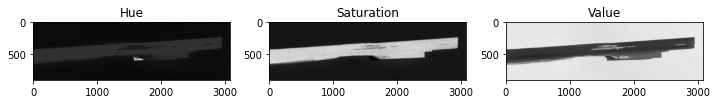

In [ ]:
x = cv2.imread("rice_leaf_diseases/bacterial_leaf_blight/DSC_0365.jpg") #read image from path
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) #convert image color to RGB
leaf_disease_hsv = rgb2hsv(x) #convert RGB image to HSV (Based on from https://mattmaulion.medium.com/color-image-segmentation-image-processing-4a04eca25c0 by Matt Maulion)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(leaf_disease_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(leaf_disease_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(leaf_disease_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value')


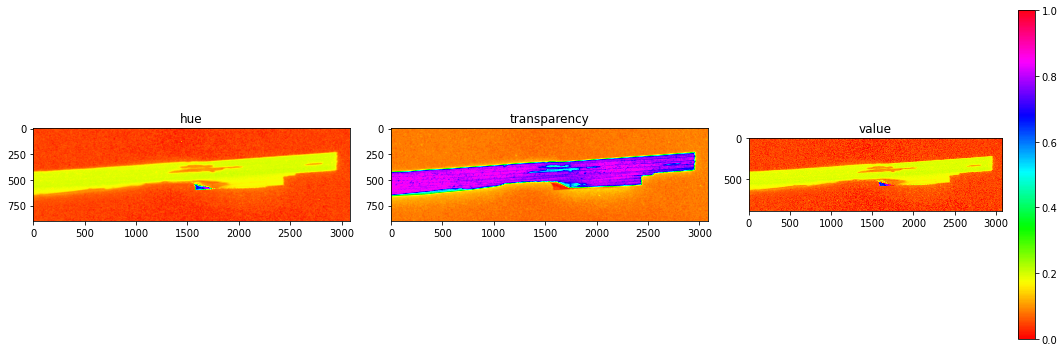

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(leaf_disease_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(leaf_disease_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(leaf_disease_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(leaf_disease_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()


In [ ]:
#lower hue 
lower_mask = leaf_disease_hsv[:,:,0] > 0.0
#upper hue
upper_mask = leaf_disease_hsv[:,:,0] < 0.15 
#transparensi
saturation_mask = leaf_disease_hsv[:,:,1] > 0.0
 
mask = upper_mask*lower_mask*saturation_mask
# red = x[:,:,0]*mask
# green = x[:,:,1]*mask
# blue = x[:,:,2]*mask
# bags_masked = np.dstack((red,green,blue))
# imshow(bags_masked)


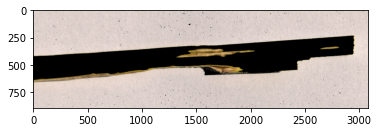

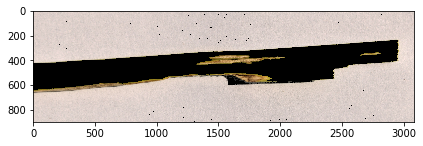

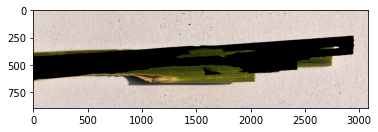

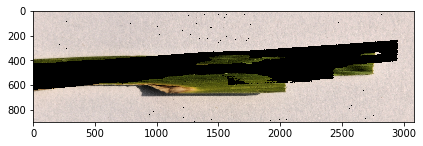

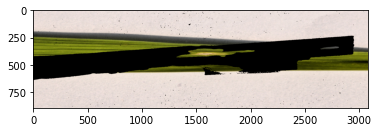

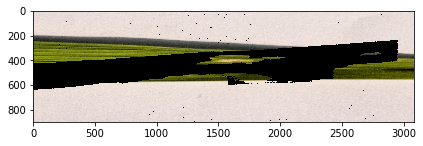

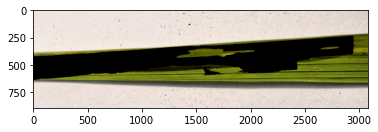

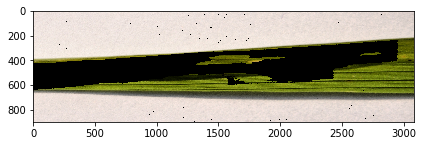

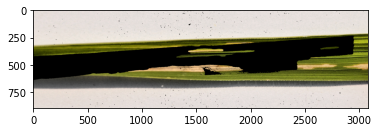

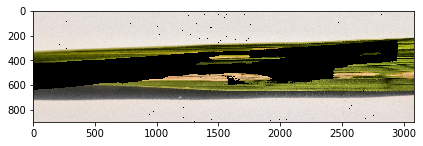

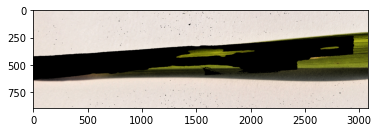

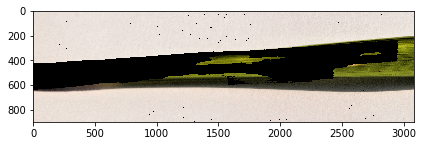

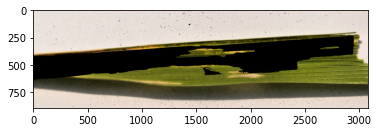

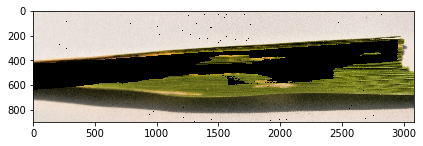

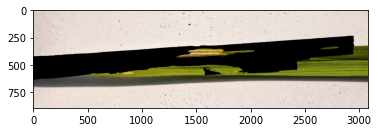

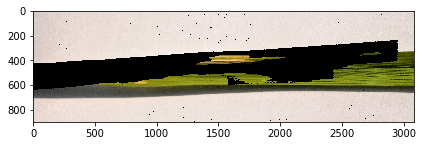

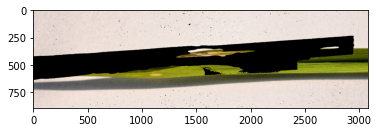

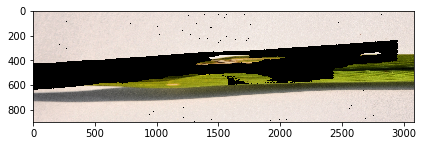

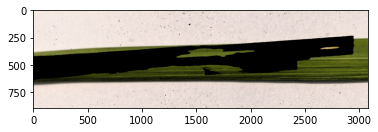

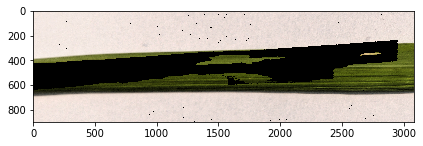

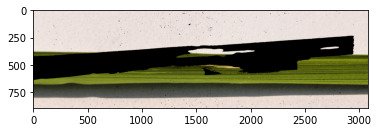

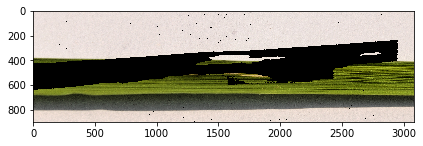

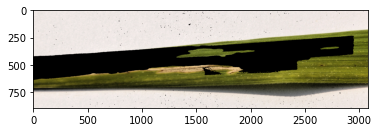

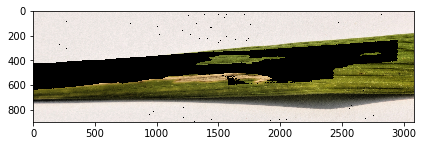

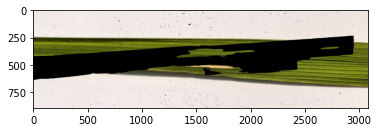

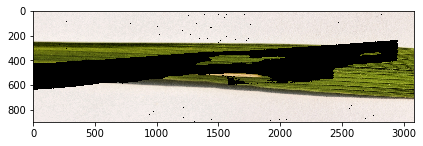

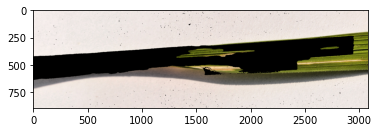

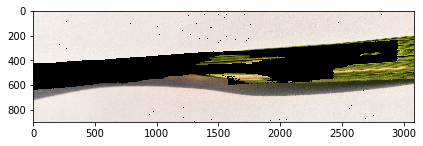

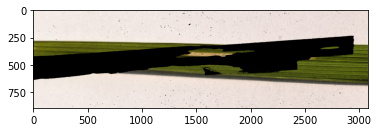

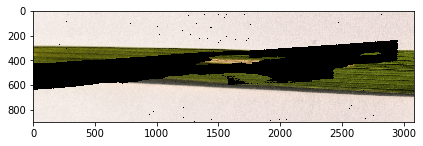

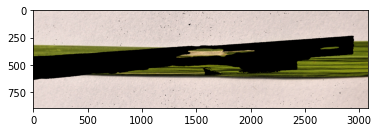

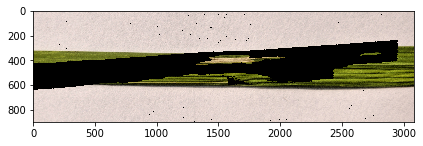

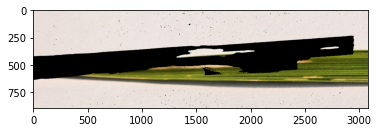

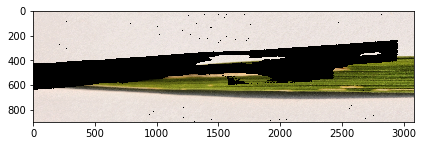

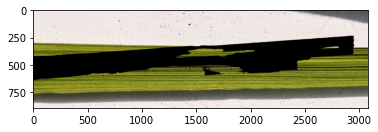

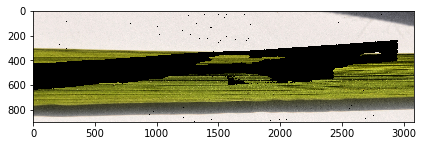

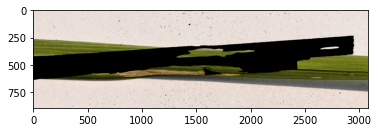

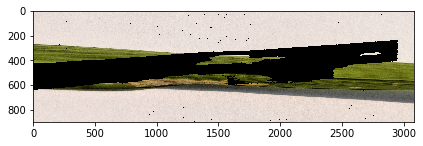

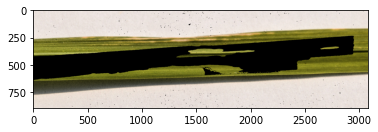

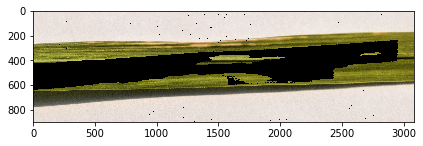

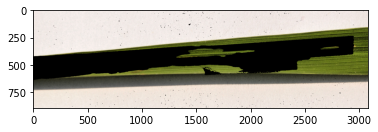

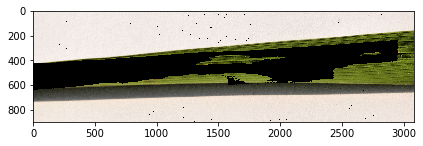

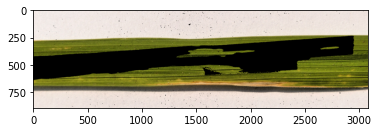

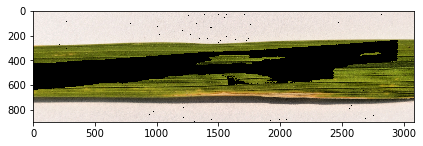

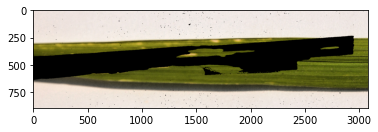

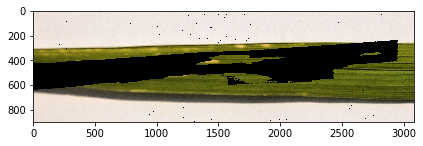

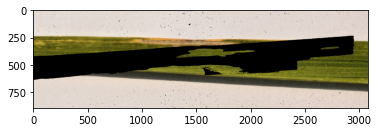

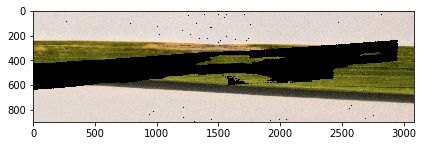

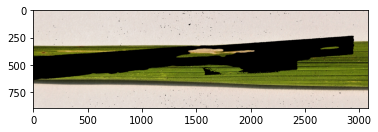

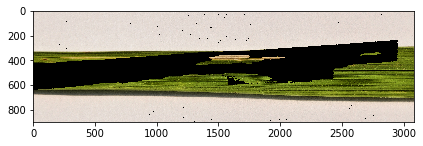

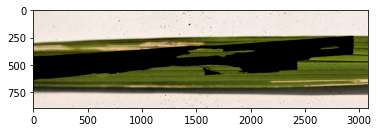

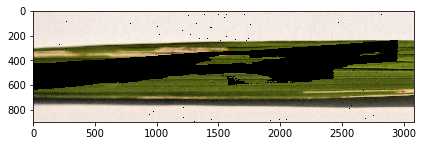

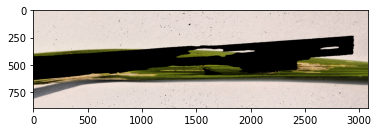

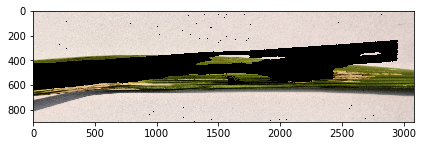

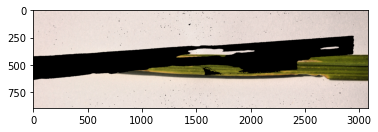

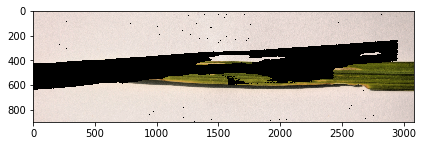

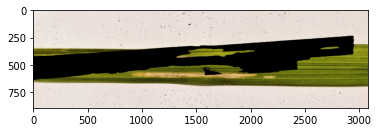

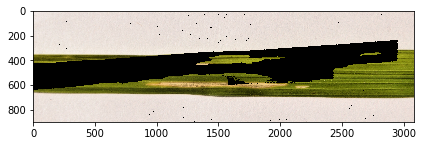

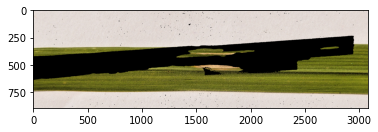

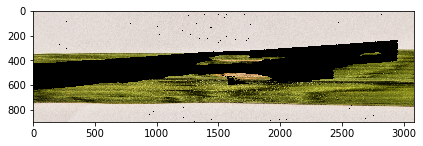

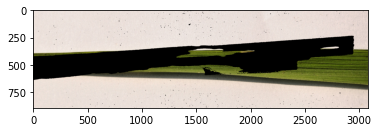

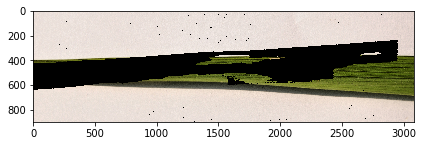

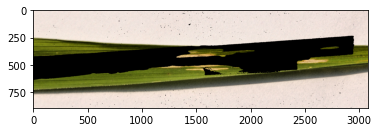

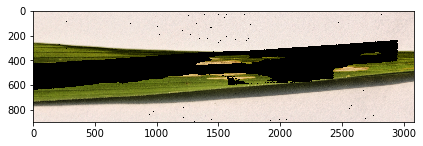

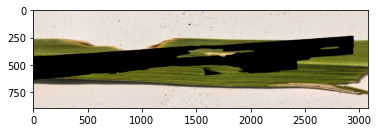

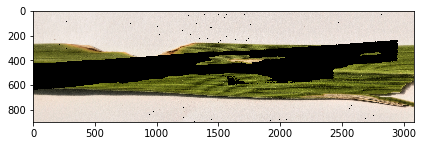

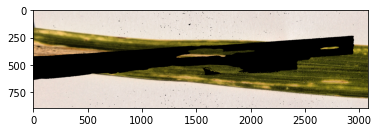

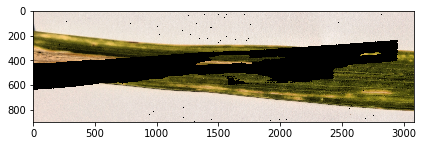

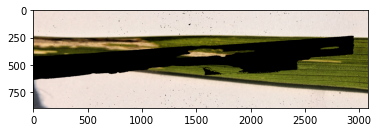

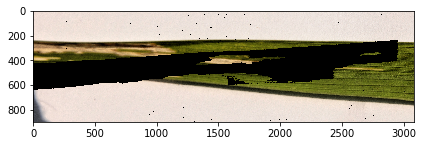

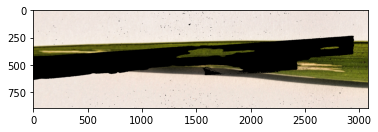

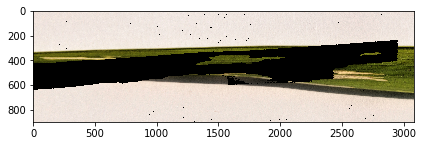

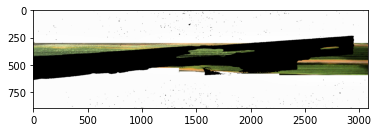

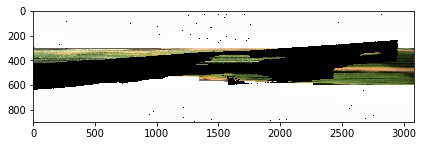

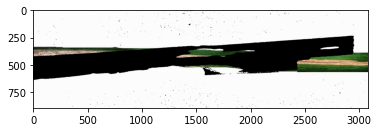

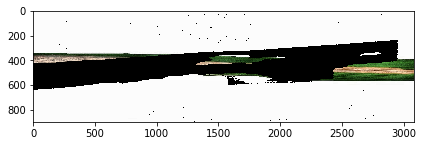

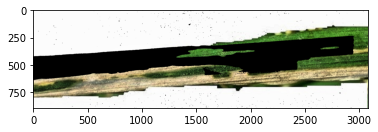

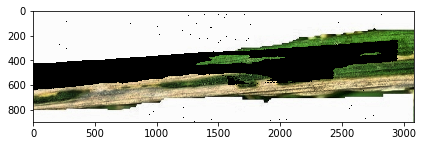

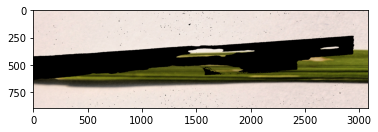

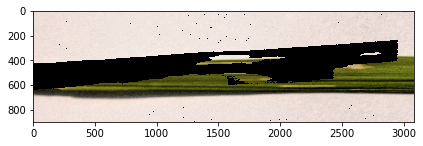

In [ ]:
blb_array = createArrayOfImage(blb_img_path)
bs_array = createArrayOfImage(bs_img_path)
ls_array = createArrayOfImage(ls_img_path)


# x = cv2.imread("rice_leaf_diseases/bacterial_leaf_blight/DSC_0402.jpg") #read image from path
# x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) #convert image color to RGB

# print(x)

# print(blb_array)
for i in range(len(blb_array)):
    # print(img)
    img = blb_array[i]
    red = img[:,:,0]*mask
    green = img[:,:,1]*mask
    blue = img[:,:,2]*mask
    img_masked = np.dstack((red,green,blue))
    plt.figure()
    plt.imshow(img_masked)
    plt.show(block = True)
    imshow(img_masked)